<a href="https://colab.research.google.com/github/NophaieViscente/AnaliseTurnover/blob/main/An%C3%A1lise_Turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as Bibliotecas. 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Lendo o arquivo csv extraído.
df = pd.read_csv('/content/drive/MyDrive/funcionarios_unique.csv', encoding='latin-1')

In [ ]:
# Retirando dados inconsistentes, que não contém a Data de Admissão.
df = df.loc[df.DataAdmissao != '-']

In [ ]:
# Separando a Coluna 'ChaveLink' que contém as movimentações dos funcionários
df[['Empresa','ID_Funcionario']] = df.ChaveFuncionario.str.split('|',expand=True)
# Deletando a Coluna Chave Funcionário pois a mesma já foi separada junto com a coluna 'ChaveLink
del df['ChaveFuncionario']

In [ ]:
# Adicionando a Coluna Situação para cada funcionário
df['Situacao'] = 'NaN'

In [ ]:
# Colocando a situação dos funcionários no DataSet.
df.loc[(df.DataDesligamento == '-'), 'Situacao'] = 'Ativo'
df.loc[(df.DataDesligamento != '-'), 'Situacao'] = 'Desligado'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7261 entries, 12 to 19349
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   DataAdmissao               7261 non-null   object
 1   DataDesligamento           7261 non-null   object
 2   SalarioAtual               7261 non-null   object
 3   SexoFuncionario            7261 non-null   object
 4   DataNascimentoFuncionario  7261 non-null   object
 5   EstadoCivilFuncionario     7261 non-null   object
 6   FaixaTempoEmpresa          7261 non-null   object
 7   GrauInstrucao              7261 non-null   object
 8   CidadeFuncionario          7261 non-null   object
 9   BairroFuncionario          7258 non-null   object
 10  FuncionarioSindicalizado   7261 non-null   object
 11  RecebeInsalubridade        7261 non-null   object
 12  RecebePericulosidade       7261 non-null   object
 13  CargaHorariaFuncionario    7261 non-null   object
 14  Empres

In [ ]:
df.DataAdmissao = pd.to_datetime(df.DataAdmissao)
df.DataNascimentoFuncionario = pd.to_datetime(df.DataNascimentoFuncionario)

In [ ]:
df.columns

Index(['DataAdmissao', 'DataDesligamento', 'SalarioAtual', 'SexoFuncionario',
       'DataNascimentoFuncionario', 'EstadoCivilFuncionario',
       'FaixaTempoEmpresa', 'GrauInstrucao', 'CidadeFuncionario',
       'BairroFuncionario', 'FuncionarioSindicalizado', 'RecebeInsalubridade',
       'RecebePericulosidade', 'CargaHorariaFuncionario', 'Empresa',
       'ID_Funcionario', 'Situacao'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7261 entries, 12 to 19349
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DataAdmissao               7261 non-null   datetime64[ns]
 1   DataDesligamento           7261 non-null   object        
 2   SalarioAtual               7261 non-null   object        
 3   SexoFuncionario            7261 non-null   object        
 4   DataNascimentoFuncionario  7261 non-null   datetime64[ns]
 5   EstadoCivilFuncionario     7261 non-null   object        
 6   FaixaTempoEmpresa          7261 non-null   object        
 7   GrauInstrucao              7261 non-null   object        
 8   CidadeFuncionario          7261 non-null   object        
 9   BairroFuncionario          7258 non-null   object        
 10  FuncionarioSindicalizado   7261 non-null   object        
 11  RecebeInsalubridade        7261 non-null   object        
 12  Rece

In [ ]:
df['Cidade_Empresa'] = 'NaN'
df.loc[(df.Empresa == '101'), 'Cidade_Empresa'] = 'Palmas-PR'
df.loc[(df.Empresa == '701'), 'Cidade_Empresa'] = 'Cacador-SC'
df.loc[(df.Empresa == '103'), 'Cidade_Empresa'] = 'Santa_Cecilia-SC'
df.loc[(df.Empresa == '703'), 'Cidade_Empresa'] = 'Palmas-PR'

In [ ]:
data = df[['Empresa', 'Cidade_Empresa',
       'SalarioAtual', 'SexoFuncionario',
       'EstadoCivilFuncionario', 'GrauInstrucao', 'FaixaTempoEmpresa',
       'FuncionarioSindicalizado', 'RecebeInsalubridade',
       'RecebePericulosidade', 'CargaHorariaFuncionario','Situacao']]

In [ ]:
# Colocando números nas categorias das 'colunasTransformar' .
for nome_coluna in data.columns :
  if (data[nome_coluna].dtype == 'object'):
    data[nome_coluna]= data[nome_coluna].astype('category')
    data[nome_coluna] = data[nome_coluna].cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
data.isnull().sum()

Empresa                     0
Cidade_Empresa              0
SalarioAtual                0
SexoFuncionario             0
EstadoCivilFuncionario      0
GrauInstrucao               0
FaixaTempoEmpresa           0
FuncionarioSindicalizado    0
RecebeInsalubridade         0
RecebePericulosidade        0
CargaHorariaFuncionario     0
Situacao                    0
dtype: int64

Text(0.5, 1.0, 'Quantidade de dados funcionários desligados(1) e Ativos(0)')

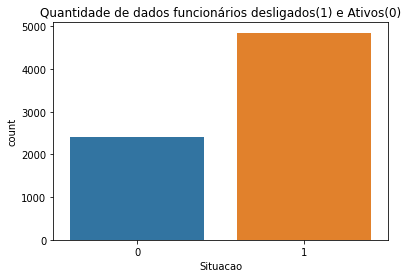

In [ ]:
sns.countplot(x='Situacao',data=data)
plt.title('Quantidade de dados funcionários desligados(1) e Ativos(0)')

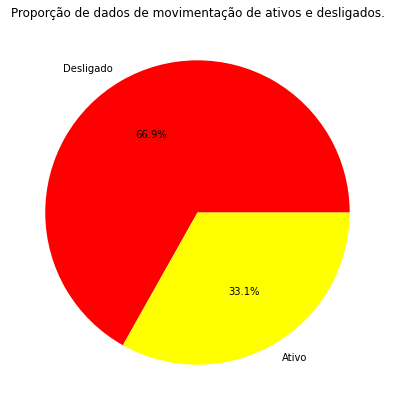

In [ ]:
# Plotando a proporção de dados na empresa.
rotulos = df['Situacao'].value_counts().index
cores = ['red','yellow']
valores = df['Situacao'].value_counts().values
plt.figure(figsize=(7,7))
plt.pie(valores,labels=rotulos,colors=cores,autopct='%1.1f%%')
plt.title('Proporção de dados de movimentação de ativos e desligados.')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


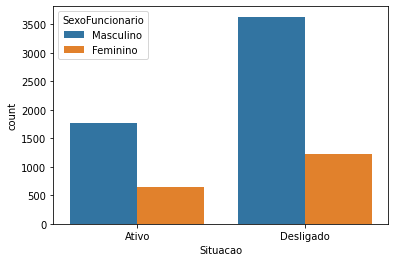

In [ ]:
# Verificando a situação por gênero.
sns.countplot(df['Situacao'], hue=df['SexoFuncionario'])
plt.show()

In [ ]:
df.CargoFuncionario = df.CargoFuncionario.str.upper()

In [ ]:
# capturando o indice das linhas que não tem o valor de salário.
listaRemover = []
for i in df.SalarioAtual.items() :
  if i[1] == '-' :
    listaRemover.append(i[0])
# Removendo as linhas capturadas do dataset.
df = df.drop(listaRemover)

In [ ]:
df.SalarioAtual = df.SalarioAtual.astype('float64')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

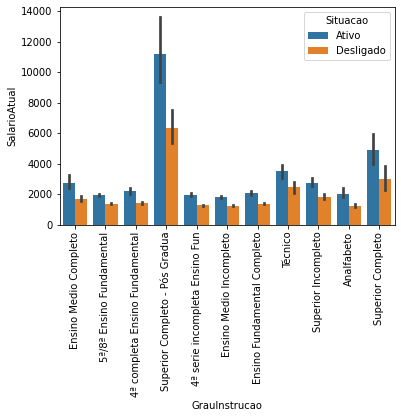

In [ ]:
sns.barplot(x='GrauInstrucao',y='SalarioAtual',hue='Situacao',data=df)
plt.xticks(rotation=90)

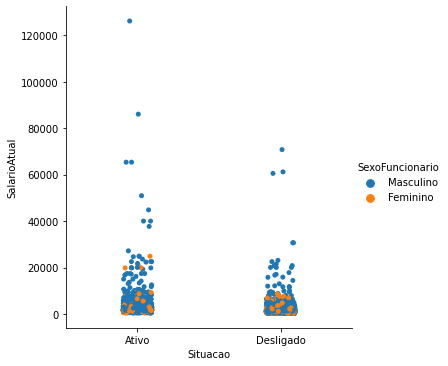

In [ ]:
sns.catplot(x='Situacao',y='SalarioAtual',hue='SexoFuncionario',data=df)
plt.show()

In [ ]:
data = data.drop('CargoFuncionario',axis=1)

In [ ]:
data.columns

Index(['Empresa', 'Cidade_Empresa', 'SalarioAtual', 'SexoFuncionario',
       'EstadoCivilFuncionario', 'GrauInstrucao', 'FaixaTempoEmpresa',
       'FuncionarioSindicalizado', 'RecebeInsalubridade',
       'RecebePericulosidade', 'CargaHorariaFuncionario', 'Situacao'],
      dtype='object')

In [ ]:
df.head(-12)

,DataAdmissao,DataDesligamento,SalarioAtual,SexoFuncionario,DataNascimentoFuncionario,EstadoCivilFuncionario,FaixaTempoEmpresa,GrauInstrucao,CidadeFuncionario,BairroFuncionario,FuncionarioSindicalizado,RecebeInsalubridade,RecebePericulosidade,CargaHorariaFuncionario,Empresa,ID_Funcionario,Situacao,Cidade_Empresa
12,1994-12-12,-,3566.74,Masculino,1965-06-13,Casado,26 a 30 Anos,Ensino Medio Completo,PALMAS,CASCATINHA,Não Sindicalizado,Não Recebe,Não Recebe,220,101,18,Ativo,Palmas-PR
18,1994-12-22,-,1961.24,Masculino,1974-11-01,Solteiro,26 a 30 Anos,5ª/8ª Ensino Fundamental,PALMAS,LAGOAO,Não Sindicalizado,Não Recebe,Não Recebe,180,101,24,Ativo,Palmas-PR
30,1995-02-13,-,6073.60,Masculino,1976-02-25,Casado,26 a 30 Anos,Ensino Medio Completo,PALMAS,SERRINHA,Não Sindicalizado,Não Recebe,Não Recebe,220,101,39,Ativo,Palmas-PR
36,1995-03-21,-,2220.66,Masculino,1963-08-29,Casado,26 a 30 Anos,4ª completa Ensino Fundamental,PALMAS,HIPICA,Não Sindicalizado,Não Recebe,Não Recebe,220,101,47,Ativo,Palmas-PR
54,1995-08-01,-,1793.21,Masculino,1965-12-20,Casado,21 a 25 Anos,4ª completa Ensino Fundamental,PALMAS,SAO SEBASTIAO,Não Sindicalizado,Não Recebe,Não Recebe,180,101,69,Ativo,Palmas-PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,2016-02-23,2019-10-28,7712.12,Feminino,1973-04-22,Solteiro,5 Anos,Superior Incompleto,RIO DE JANEIRO,TIJUCA,Não Sindicalizado,Não Recebe,Não Recebe,220,702,10,Desligado,NaN
19334,2017-05-29,-,20093.89,Masculino,1984-08-03,Casado,4 Anos,Superior Completo - Pós Gradua,CURITIBA,AGUA VERDE,Não Sindicalizado,Não Recebe,Não Recebe,220,702,11,Ativo,NaN
19335,2017-06-19,2021-06-01,7055.22,Feminino,1977-03-01,Casado,4 Anos,Superior Completo,SAO PAULO,PINHEIROS,Não Sindicalizado,Não Recebe,Não Recebe,220,702,12,Desligado,NaN
19336,2017-08-14,2019-06-30,1240.81,Masculino,1994-07-11,Solteiro,3 Anos,Superior Incompleto,CURITIBA,JARDIM DAS AMÉRICAS,Não Sindicalizado,Não Recebe,Não Recebe,180,702,13,Desligado,NaN


In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(['Situacao'],axis=1).values
y = data.Situacao.values

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold,cross_validate
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
SEED = 42
np.random.seed(SEED)
X_treino,X_teste,y_treino,y_teste = train_test_split(X,y,test_size=0.33, random_state=SEED)

In [ ]:
# Usando KFold para a mistura dos dados de treino . 
cv = KFold(n_splits=5,shuffle=True)

In [ ]:
# Passando e treinando os modelos de Machine Learning . 
modelo_svc = SVC()
modeloFlorestaAleatoria = RandomForestClassifier(n_estimators=9)
modeloArvoreDecisao = DecisionTreeClassifier(max_depth=20)
modeloRegressaoLogistica = LogisticRegression(solver='liblinear',max_iter=25)
modelos = [modeloRegressaoLogistica, modeloFlorestaAleatoria, modeloArvoreDecisao]
nome = ['Regressão Logística', 
         'Floresta Aleatória','Arvore Decisão']
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
cont = 0
for item in modelos:
    
    resultados = cross_val_score(item, X_treino, y_treino, cv = cv, 
                              scoring = 'accuracy')
    media = resultados.mean()
    desvioPadrao = resultados.std()
    print('Acurácia média - Modelo {}: {:.2f}%'
          .format(nome[cont], media*100))
    print('Intervalo de acurácia - Modelo {}: [{:.2f}% ~ {:.2f}%]\n'
           .format(nome[cont], 
                  (media - 2*desvioPadrao)*100, (media + 2*desvioPadrao)*100))
    cont += 1

Acurácia média - Modelo Regressão Logística: 66.92%
Intervalo de acurácia - Modelo Regressão Logística: [66.23% ~ 67.61%]

Acurácia média - Modelo Floresta Aleatória: 86.00%
Intervalo de acurácia - Modelo Floresta Aleatória: [84.33% ~ 87.66%]

Acurácia média - Modelo Arvore Decisão: 87.48%
Intervalo de acurácia - Modelo Arvore Decisão: [86.34% ~ 88.62%]



In [ ]:
# Criando função para determinar a precisão do modelo.
def intervalo_precisao(resultados):
    media = resultados.mean()
    desvioPadrao = resultados.std()
    print('Precisão média: {:.2f}%'.format(media*100))
    print('Intervalo de Precisão: [{:.2f}% ~ {:.2f}%]'
          .format((media - 2*desvioPadrao)*100, (media + 2*desvioPadrao)*100))
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
modeloFlorestaAleatoria = RandomForestClassifier(n_estimators=5)
resultados = cross_val_score(modeloFlorestaAleatoria, X_treino, y_treino, cv = cv, 
                          scoring='precision_weighted')
intervalo_precisao(resultados)

Precisão média: 85.55%
Intervalo de Precisão: [82.73% ~ 88.36%]


In [ ]:
def intervalo_recall(results):
    mean = results.mean()
    dv = results.std()
    print('Recall médio: {:.2f}%'.format(mean*100))
    print('Intervalo de Recall: [{:.2f}% ~ {:.2f}%]'
          .format((mean - 2*dv)*100, (mean + 2*dv)*100))
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
model = RandomForestClassifier(n_estimators=5)
results = cross_val_score(model, X_treino, y_treino, cv = cv, scoring = 'recall')
intervalo_recall(results)

Recall médio: 88.50%
Intervalo de Recall: [85.46% ~ 91.53%]


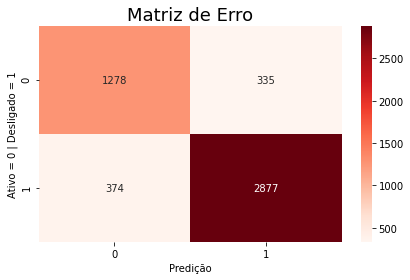

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
model = RandomForestClassifier(n_estimators=5)
y_pred = cross_val_predict(model, X_treino, y_treino, cv = cv)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_treino, y_pred), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Erro", fontsize=18)
ax.set_ylabel("Ativo = 0 | Desligado = 1")
ax.set_xlabel("Predição")
plt.tight_layout()

In [ ]:
modeloFlorestaAleatoria_final = RandomForestClassifier(n_estimators=3)
modeloFlorestaAleatoria_final.fit(X_treino, y_treino)
y_pred = modeloFlorestaAleatoria_final.predict(X_teste)
# imprimindo relatório de classificação
print("Relatório de Classificação:\n", 
       classification_report(y_teste, y_pred, digits=2))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79       794
           1       0.91      0.88      0.89      1603

    accuracy                           0.86      2397
   macro avg       0.84      0.85      0.84      2397
weighted avg       0.86      0.86      0.86      2397



In [ ]:
from sklearn.externals import joblib
joblib.dump(modeloFlorestaAleatoria_final, 'modelo.pkl')

['modelo.pkl']